In [1]:
import pandas as pd
from PIL import Image
import os
import warnings
from urllib.request import urlopen
warnings.filterwarnings("ignore", category=FutureWarning)
from fbref import SoccerPlot
from utils import *

# Example usage

In [2]:
BASE_DIR = os.path.join('..', 'data')
ENGINEERED_DIR = os.path.join(BASE_DIR, 'engineered', '2023', 'brazil_serie_A')
std_csv = os.path.join(ENGINEERED_DIR, 'squad_std_stats.csv')
df = pd.read_csv(std_csv)

In [3]:
df = df.loc[df['Pos'].str.contains('FW')]


In [4]:
cols_filter = df.filter([
                            'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast',
       'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK',
       'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG',
       'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG'
]).columns

plot = SoccerPlot(df, cols_filter)

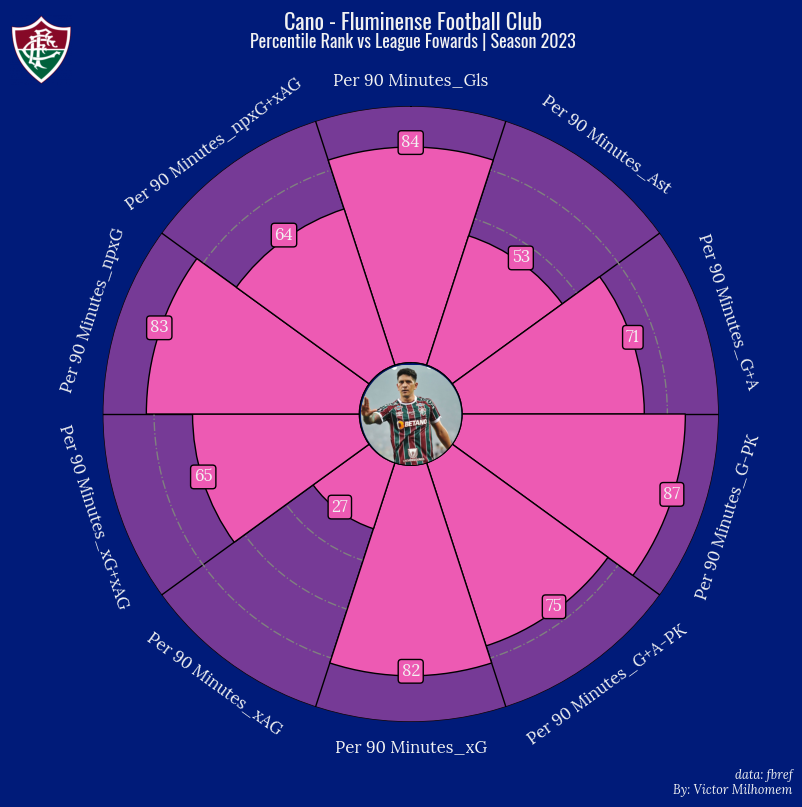

In [10]:
title = "Cano - Fluminense Football Club"
subtitle = "Percentile Rank vs League Fowards | Season 2023"
player_image = Image.open(urlopen('https://tmssl.akamaized.net/images/foto/galerie/german-cano-1695926165-117979.jpeg?lm=1695926174'))
team_image = Image.open(urlopen('https://tmssl.akamaized.net/images/wappen/head/2462.png?lm=1648225934'))
plot.generate_simple_pizza_plot('Germán Cano', title, subtitle, 'data: fbref', 'By: Victor Milhomem', player_image, team_image, color_palette=COLORS_PALETTE_9)

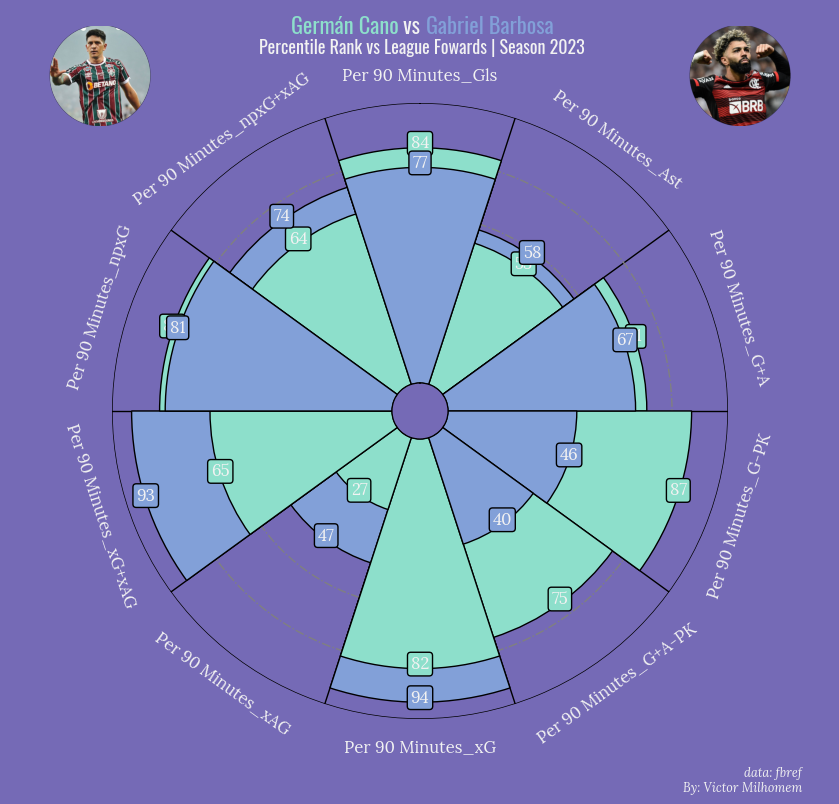

In [7]:
#"#D70232" 3129d6
subtitle = "Percentile Rank vs League Fowards | Season 2023"
player2_image = Image.open(urlopen('https://tmssl.akamaized.net/images/foto/galerie/gabriel-barbosa-flamengo-2022-1660679253-90334.jpg?lm=1660679293'))
plot.generate_compare_pizza_plot('Germán Cano', 'Gabriel Barbosa', subtitle, 'data: fbref', 'By: Victor Milhomem', player_image, player2_image, color_palette=COLORS_PALETTE_10)